# Assignment 2 (Data Mining & Prediction by machines)

### Importing the required libraries

In [68]:
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import tkinter as tk
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
import time

### 1. Data Collection

##### 1.1) Initializing Chrome WebDriver.


In [2]:
driver=webdriver.Chrome()

##### 1.2) Extracting the names of residential areas in Delhi & storing them in a list.

In [3]:
driver.get("https://www.movingsolutions.in/blog/2020/01/10/best-residential-areas-and-places-to-live-in-delhi/")
soup=BeautifulSoup(driver.page_source, "html.parser")
localities=[]
for i in soup.find_all("h3"):
    try:
        b=i.text
        b=b.split(".")
        localities.append(b[1])
    except IndexError:
        continue
for i in range(len(localities)):
    if "'" in localities[i]:
        localities[i]=localities[i].replace("'", "")
    elif "&" in localities[i]:
        localities[i]=localities[i].replace("&","")
    elif "," in localities[i]:
        localities[i]=localities[i].replace(",", "")
for i in range((len(localities))):
    localities[i]=localities[i].replace(" ", "-")
for i in range(len(localities)):
    if "--" in localities[i]:
        localities[i]=localities[i].replace("--", "-")

In [4]:
for i in range(len(localities)):
    localities[i]=localities[i].lower()

In [5]:
o=[]
driver.get("https://en.wikipedia.org/wiki/List_of_neighbourhoods_of_Delhi")
soup=BeautifulSoup(driver.page_source, "html.parser")
for i in soup.find_all("li"):
    o.append(i.text)
h=o.index("Wikimedia Commons")
j=o.index("Districts of Delhi")
o=o[h+1:j]
for i in range(len(o)):
    o[i]=o[i].lower()
for i in o:
    if " " in i:
        localities.append(i.replace(" ", "-"))

In [8]:
for i in range(len(localities)):
    localities[i]=localities[i].strip("-")

##### 1.3) Going to Nobroker.com and fetching the house listings based upon the previously mined residential areas & storing them in lists.

In [ ]:
price=[]
emi=[]
area=[]
parking=[]
size=[]
bath=[]
facing=[]
listing=[]
locality=[]
scroll=19
for x in localities:
    link=f"https://www.nobroker.in/flats-for-sale-in-{x}-delhi"
    driver.get(link)
    time.sleep(2)
    soup=BeautifulSoup(driver.page_source, "html.parser")
    try:
        offset=soup.find(class_="heading-5 truncate m-0 px-0 pt-1.5p pb-0.5p")
        offset_value=offset.text
        offset_value=offset_value.split(" ")
        offset_value=int(offset_value[0])
        
    except:
        offset_value=0
    for i in range(offset_value//scroll+2):
        driver.execute_script("window.scrollBy(0,document.body.scrollHeight)")
        time.sleep(2)
        driver.execute_script("window.scrollBy(document.body.scrollHeight,0)")
    soup=BeautifulSoup(driver.page_source, "html.parser")
    site_price=soup.find_all(class_="font-semi-bold heading-6")
    a=soup.find_all(class_="flex p-0.5p border-b border-b-solid border-b-cardbordercolor items-center")
    e=soup.find_all(class_="overflow-hidden overflow-ellipsis whitespace-nowrap max-w-80pe po:max-w-full")
    d=soup.find_all(class_="flex p-0.5p items-center")
    location=x
    location=location.replace("-"," ")
    location=location[1:]
    for i in range(0,len(site_price),3):
        price.append(site_price[i].text)
        emi.append(site_price[i+1].text)
        area.append(site_price[i+2].text)
        locality.append(x)
    for i in range(len(a)):
        b=a[i].text
        if "Don't Know" in b:
            b=b.split(" ")
            size.append(f"{b[1][-1]} BHK")
            c=b[0].split("F")
            facing.append(np.nan)
        else:
            b=b.split(" ")
            size.append(f"{b[0][-1]} BHK")
            c=b[0].split("F")
            facing.append(c[0])
    for i in range(len(a)):
        b=d[i].text
        bath.append(b[0])
        j=b.find("Parking")
        k=b.find("rooms")
        parking.append(b[k+5:j])
    for i in range(len(a)):
        listing.append(e[i].text)

##### 1.4) Writing the obtained lists into a Pandas DataFrame and writing it to an excel workbook.

In [19]:
df=pd.DataFrame({"Price":price, "Emi":emi, "Area": area, "size": size, "bath": bath, "facing":facing, "parking":parking, "listing": listing, "locality": locality})
df.to_excel("New Delhi Housing Data.xlsx")

### 2. Data PreProcessing/Cleaning & Exploratory Data Analysis

##### 2.1) Loading the excel workbook in a Pandas DataFrame.

In [69]:
df=pd.read_excel("New Delhi Housing Data.xlsx", sheet_name="Sheet1")
df

,Unnamed: 0,Price,Emi,Area,size,bath,facing,parking,listing,locality
0,0,₹1.7 Crores,"₹97,434/Month","1,100 sqft",3 BHK,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater-kailash
1,1,₹3 Crores,₹1.72 Lacs/Month,"3,350 sqft",+ BHK,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater-kailash
2,2,₹7.5 Crores,₹4.3 Lacs/Month,"2,700 sqft",3 BHK,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater-kailash
3,3,₹1.5 Crores,"₹85,971/Month","1,800 sqft",2 BHK,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater-kailash
4,4,₹3.5 Crores,₹2.01 Lacs/Month,"3,200 sqft",+ BHK,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater-kailash
...,...,...,...,...,...,...,...,...,...,...
2185,2185,₹32 Lacs,"₹18,340/Month",900 sqft,2 BHK,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam-nagar
2186,2186,₹32 Lacs,"₹18,340/Month","1,000 sqft",3 BHK,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam-nagar
2187,2187,₹35 Lacs,"₹20,060/Month",540 sqft,2 BHK,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam-nagar
2188,2188,₹55 Lacs,"₹31,522/Month","1,200 sqft",3 BHK,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam-nagar


##### 2.2) Converting string based data into numeric data.

In [70]:
a=df["size"].tolist()
for i in range(len(a)):
    b=a[i]
    b=b.split(" ")
    a[i]=b[0]
for i in range(len(a)):
    if a[i]=="+":
        a[i]=int(4)
    else:
        a[i]=int(a[i])
df["size"]=a

In [71]:
df

,Unnamed: 0,Price,Emi,Area,size,bath,facing,parking,listing,locality
0,0,₹1.7 Crores,"₹97,434/Month","1,100 sqft",3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater-kailash
1,1,₹3 Crores,₹1.72 Lacs/Month,"3,350 sqft",4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater-kailash
2,2,₹7.5 Crores,₹4.3 Lacs/Month,"2,700 sqft",3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater-kailash
3,3,₹1.5 Crores,"₹85,971/Month","1,800 sqft",2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater-kailash
4,4,₹3.5 Crores,₹2.01 Lacs/Month,"3,200 sqft",4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater-kailash
...,...,...,...,...,...,...,...,...,...,...
2185,2185,₹32 Lacs,"₹18,340/Month",900 sqft,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam-nagar
2186,2186,₹32 Lacs,"₹18,340/Month","1,000 sqft",3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam-nagar
2187,2187,₹35 Lacs,"₹20,060/Month",540 sqft,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam-nagar
2188,2188,₹55 Lacs,"₹31,522/Month","1,200 sqft",3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam-nagar


In [72]:
a=df["Price"].tolist()
for i in range(len(a)):
    b=a[i]
    b=b.split(" ")
    if b[1]=="Crores" or b[1]=="Crore":
        if "." in b[0]:
            c=b[0].split(".")
            if len(c[1])==1:
                c[0]=c[0].strip("₹")
                d=int((c[0])+(c[1]))*10
            else:
                c[0]=c[0].strip("₹")
                d=int((c[0])+(c[1]))
        else:
            b[0]=b[0].strip("₹")
            d=int(b[0])*100
    else:
        if "." in b[0]:
            c=b[0].split(".")
            c[0]=c[0].strip("₹")
            d=int(c[0])
        else:
            b[0]=b[0].strip("₹")
            d=int(b[0])
    a[i]=d
df["Price"]=a

In [73]:
df=df.drop(columns=["Unnamed: 0"], axis="columns")

In [74]:
df

,Price,Emi,Area,size,bath,facing,parking,listing,locality
0,170,"₹97,434/Month","1,100 sqft",3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater-kailash
1,300,₹1.72 Lacs/Month,"3,350 sqft",4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater-kailash
2,750,₹4.3 Lacs/Month,"2,700 sqft",3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater-kailash
3,150,"₹85,971/Month","1,800 sqft",2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater-kailash
4,350,₹2.01 Lacs/Month,"3,200 sqft",4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater-kailash
...,...,...,...,...,...,...,...,...,...
2185,32,"₹18,340/Month",900 sqft,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam-nagar
2186,32,"₹18,340/Month","1,000 sqft",3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam-nagar
2187,35,"₹20,060/Month",540 sqft,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam-nagar
2188,55,"₹31,522/Month","1,200 sqft",3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam-nagar


In [75]:
a=df["Area"].tolist()
for i in range(len(a)):
    b=a[i].split(" ")
    if "," in b[0]:
        c=b[0].split(",")
        d=int(c[0]+c[1])
    else:
        d=int(b[0])
    a[i]=d
df["Area"]=a

In [76]:
a=df["locality"].tolist()
for i in range(len(a)):
    a[i]=a[i].replace("-", " ")
df["locality"]=a

In [77]:
df

,Price,Emi,Area,size,bath,facing,parking,listing,locality
0,170,"₹97,434/Month",1100,3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater kailash
1,300,₹1.72 Lacs/Month,3350,4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater kailash
2,750,₹4.3 Lacs/Month,2700,3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater kailash
3,150,"₹85,971/Month",1800,2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater kailash
4,350,₹2.01 Lacs/Month,3200,4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater kailash
...,...,...,...,...,...,...,...,...,...
2185,32,"₹18,340/Month",900,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam nagar
2186,32,"₹18,340/Month",1000,3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam nagar
2187,35,"₹20,060/Month",540,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam nagar
2188,55,"₹31,522/Month",1200,3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam nagar


In [78]:
df.dtypes

Price        int64
Emi         object
Area         int64
size         int64
bath         int64
facing      object
parking     object
listing     object
locality    object
dtype: object

##### 2.3) Exploratory Data Analysis & outlier removal.

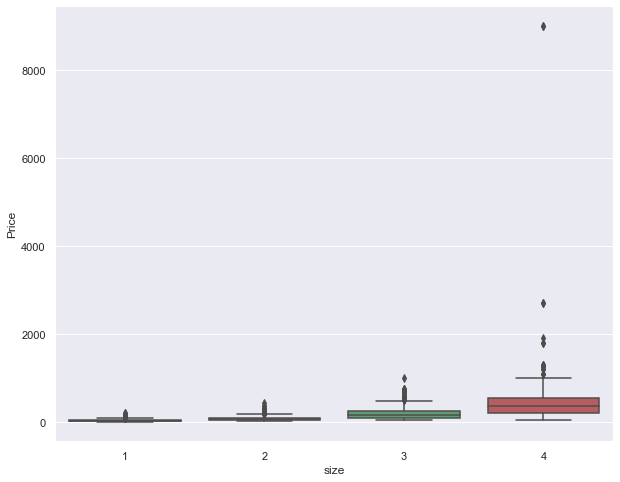

In [79]:
sns.boxplot(x="size", y="Price", data=df)
sns.set(rc={"figure.figsize":(10, 8)})

In [80]:
df[df["Price"]>2000]

,Price,Emi,Area,size,bath,facing,parking,listing,locality
102,9000,₹51.58 Lacs/Month,20000,4,2,NaN,Bike and Car,4+ BHK Flat For Sale In Kalindi Colony,new friends colony
424,2700,₹15.47 Lacs/Month,2000,4,1,North-East,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,punjabi bagh
1499,9000,₹51.58 Lacs/Month,20000,4,2,NaN,Bike and Car,4+ BHK Flat For Sale In Kalindi Colony,new friends colony
2067,2700,₹15.47 Lacs/Month,2000,4,1,North-East,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,punjabi bagh


In [81]:
df=df.drop(df[df["Price"]>2000].index)

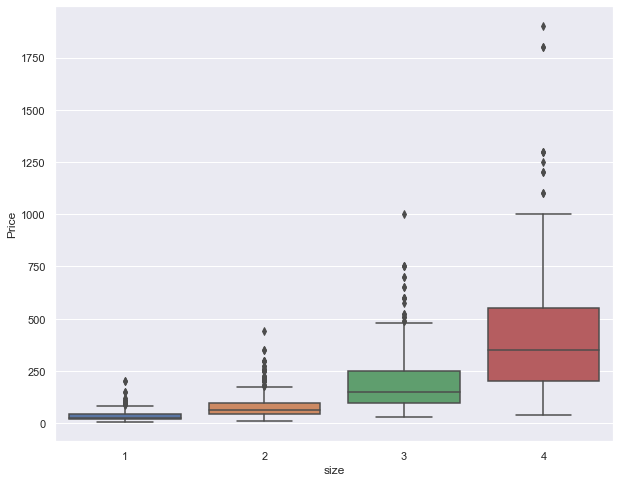

In [82]:
sns.boxplot(x="size", y="Price", data=df)
sns.set(rc={"figure.figsize":(10, 8)})

([<matplotlib.patches.Wedge at 0x1a523204790>,
 [Text(2.1284083351729493, 0.556666829231198, 'greater kailash'),
  Text(1.6223068229561721, 1.485974620304752, 'vasant kunj'),
  Text(0.9165268578038892, 1.9999946297238227, 'new friends colony'),
  Text(0.19891591974922615, 2.190988922124053, 'saket'),
  Text(-0.4860225781196134, 2.1456425735797575, 'sainik farm'),
  Text(-1.0743459908609467, 1.9198387150802567, 'chittaranjan park'),
  Text(-1.5745215746208727, 1.5365161278207944, 'malviya nagar'),
  Text(-1.9455109747231556, 1.0271256238804278, 'hauz khas'),
  Text(-2.156875291155774, 0.43346162275534456, 'gulmohar park'),
  Text(-2.191272526297698, -0.19576699285861768, 'preet vihar'),
  Text(-2.045880459349933, -0.8089333384464424, 'mayur vihar'),
  Text(-1.732628203616374, -1.3557284049665321, 'punjabi bagh'),
  Text(-1.2823608566476015, -1.7876103136136885, 'janakpuri'),
  Text(-0.7942112543756836, -2.051640437168025, 'paschim vihar'),
  Text(-0.3899804658736232, -2.165159402038795,

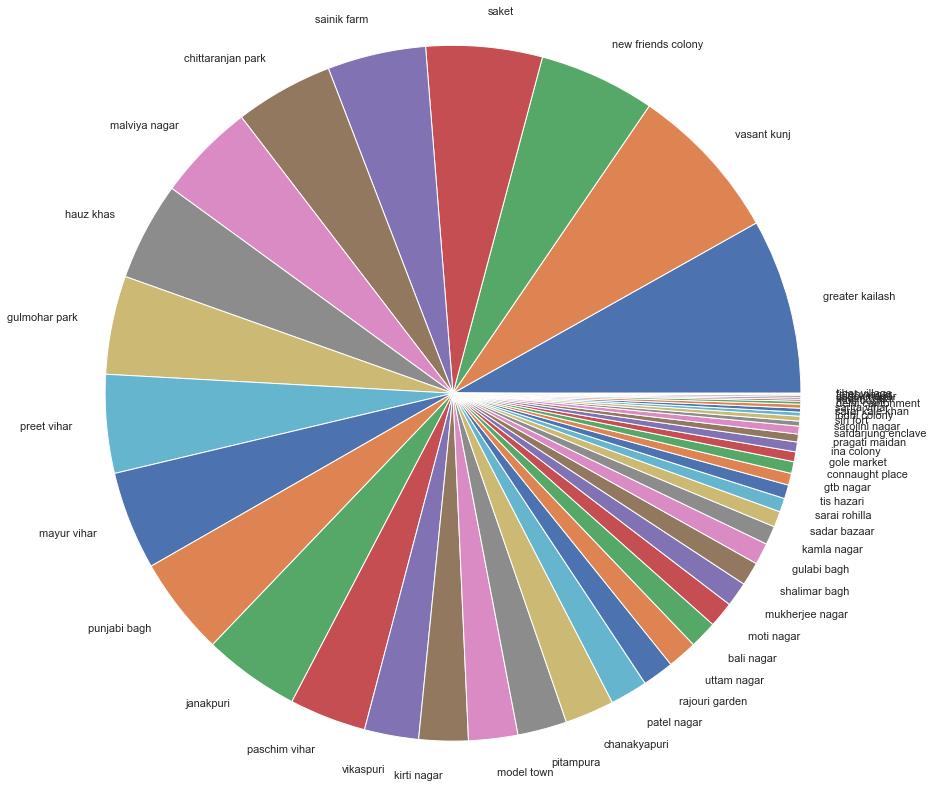

In [83]:
a=df["locality"].unique().tolist()
b=df["locality"].value_counts().tolist()
plt.pie(x=b, labels=a, radius=2)

Text(0.5, 1.0, 'Parking Space')

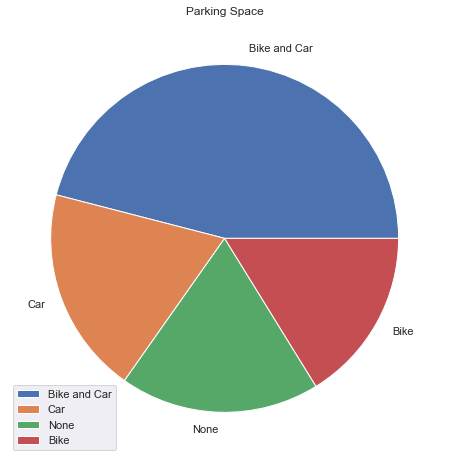

In [84]:
a=df["parking"].unique().tolist()
b=df["parking"].value_counts().tolist()
plt.pie(x=b, labels=a)
plt.legend()
plt.title("Parking Space")

Text(0.5, 1.0, 'Total Number of BHK')

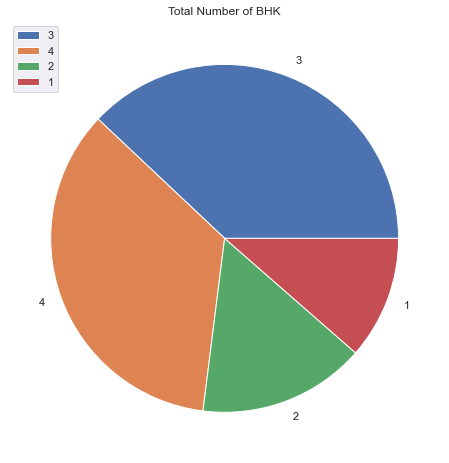

In [85]:
a=df["size"].unique().tolist()
b=df["size"].value_counts().tolist()
plt.pie(x=b, labels=a)
plt.legend()
plt.title("Total Number of BHK")

In [86]:
df["price_per_sqft"]=df["Price"]*100000/df["Area"]
df

,Price,Emi,Area,size,bath,facing,parking,listing,locality,price_per_sqft
0,170,"₹97,434/Month",1100,3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater kailash,15454.545455
1,300,₹1.72 Lacs/Month,3350,4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater kailash,8955.223881
2,750,₹4.3 Lacs/Month,2700,3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater kailash,27777.777778
3,150,"₹85,971/Month",1800,2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater kailash,8333.333333
4,350,₹2.01 Lacs/Month,3200,4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater kailash,10937.500000
...,...,...,...,...,...,...,...,...,...,...
2185,32,"₹18,340/Month",900,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam nagar,3555.555556
2186,32,"₹18,340/Month",1000,3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam nagar,3200.000000
2187,35,"₹20,060/Month",540,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam nagar,6481.481481
2188,55,"₹31,522/Month",1200,3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam nagar,4583.333333


In [87]:
df.locality=df.locality.apply(lambda x: x.strip())
location_stats=df.groupby("locality")["locality"].agg('count').sort_values(ascending=False)

In [88]:
localityless8=location_stats[location_stats<=8]
localityless8

locality
tihar village       8
gulmohar park       8
siri fort           5
chanakyapuri        5
gole market         4
delhi cantonment    4
moti bagh           4
gtb nagar           3
sarai kale khan     2
pragati maidan      2
connaught place     2
sarojini nagar      1
tis hazari          1
Name: locality, dtype: int64

In [89]:
len(df.locality.unique())

48

In [90]:
df.locality=df.locality.apply(lambda x: 'other' if x in localityless8 else x)

In [91]:
len(df.locality.unique())

36

##### 2.4) PreProcessing the data.

In [92]:
df2=pd.get_dummies(df.locality)
df2

,ashok nagar,bali nagar,chittaranjan park,fateh nagar,greater kailash,gulabi bagh,hauz khas,ina colony,janakpuri,kamla nagar,...,safdarjung enclave,sainik farm,saket,sarai rohilla,sarita vihar,shalimar bagh,uttam nagar,vasant kunj,vasant vihar,vikaspuri
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [93]:
df3=pd.concat([df,df2], axis='columns')
df3

,Price,Emi,Area,size,bath,facing,parking,listing,locality,price_per_sqft,...,safdarjung enclave,sainik farm,saket,sarai rohilla,sarita vihar,shalimar bagh,uttam nagar,vasant kunj,vasant vihar,vikaspuri
0,170,"₹97,434/Month",1100,3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,greater kailash,15454.545455,...,0,0,0,0,0,0,0,0,0,0
1,300,₹1.72 Lacs/Month,3350,4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,greater kailash,8955.223881,...,0,0,0,0,0,0,0,0,0,0
2,750,₹4.3 Lacs/Month,2700,3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,greater kailash,27777.777778,...,0,0,0,0,0,0,0,0,0,0
3,150,"₹85,971/Month",1800,2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,greater kailash,8333.333333,...,0,0,0,0,0,0,0,0,0,0
4,350,₹2.01 Lacs/Month,3200,4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,greater kailash,10937.500000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,32,"₹18,340/Month",900,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,uttam nagar,3555.555556,...,0,0,0,0,0,0,1,0,0,0
2186,32,"₹18,340/Month",1000,3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,uttam nagar,3200.000000,...,0,0,0,0,0,0,1,0,0,0
2187,35,"₹20,060/Month",540,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,uttam nagar,6481.481481,...,0,0,0,0,0,0,1,0,0,0
2188,55,"₹31,522/Month",1200,3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,uttam nagar,4583.333333,...,0,0,0,0,0,0,1,0,0,0


In [94]:
df3=df3.drop(columns=["locality"], axis='columns')
df3

,Price,Emi,Area,size,bath,facing,parking,listing,price_per_sqft,ashok nagar,...,safdarjung enclave,sainik farm,saket,sarai rohilla,sarita vihar,shalimar bagh,uttam nagar,vasant kunj,vasant vihar,vikaspuri
0,170,"₹97,434/Month",1100,3,2,East,Bike and Car,3 BHK Flat In Dda Flat For Sale In Greater K...,15454.545455,0,...,0,0,0,0,0,0,0,0,0,0
1,300,₹1.72 Lacs/Month,3350,4,5,North,Bike and Car,4+ BHK Flat In Standalone Building For Sale ...,8955.223881,0,...,0,0,0,0,0,0,0,0,0,0
2,750,₹4.3 Lacs/Month,2700,3,4,NaN,Car,3 BHK Flat In Gk2 S Block Park For Sale In G...,27777.777778,0,...,0,0,0,0,0,0,0,0,0,0
3,150,"₹85,971/Month",1800,2,1,South-West,Bike and Car,2 BHK Flat In Dda Flats For Sale In Greater...,8333.333333,0,...,0,0,0,0,0,0,0,0,0,0
4,350,₹2.01 Lacs/Month,3200,4,4,North-East,None,4+ BHK Flat For Sale In Greater Kailash,10937.500000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,32,"₹18,340/Month",900,2,2,NaN,None,2 BHK Flat In Stan For Sale In Uttam Nagar,3555.555556,0,...,0,0,0,0,0,0,1,0,0,0
2186,32,"₹18,340/Month",1000,3,2,North-West,Car,3 BHK Flat In Sb For Sale In Uttam Nagar West,3200.000000,0,...,0,0,0,0,0,0,1,0,0,0
2187,35,"₹20,060/Month",540,2,1,North,Bike,2 BHK Flat For Sale In Uttam Nagar,6481.481481,0,...,0,0,0,0,0,0,1,0,0,0
2188,55,"₹31,522/Month",1200,3,3,East,Car,3 BHK Flat In Builder Floor For Sale In Delhi,4583.333333,0,...,0,0,0,0,0,0,1,0,0,0


In [95]:
df3=df3.drop(columns="Emi", axis="columns")

In [96]:
df3.shape

(2186, 44)

In [97]:
df3=df3.drop(columns=["listing", "parking", "facing"], axis="columns")

In [98]:
X=df3.drop('Price', axis='columns')
X

,Area,size,bath,price_per_sqft,ashok nagar,bali nagar,chittaranjan park,fateh nagar,greater kailash,gulabi bagh,...,safdarjung enclave,sainik farm,saket,sarai rohilla,sarita vihar,shalimar bagh,uttam nagar,vasant kunj,vasant vihar,vikaspuri
0,1100,3,2,15454.545455,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3350,4,5,8955.223881,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2700,3,4,27777.777778,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1800,2,1,8333.333333,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3200,4,4,10937.500000,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,900,2,2,3555.555556,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2186,1000,3,2,3200.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2187,540,2,1,6481.481481,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2188,1200,3,3,4583.333333,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [99]:
y=df3.Price
y

0       170
1       300
2       750
3       150
4       350
       ... 
2185     32
2186     32
2187     35
2188     55
2189     40
Name: Price, Length: 2186, dtype: int64

### 3. Training & Testing the Linear Regression Model

##### 3.1) Training the model and checking prediction accuracy.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [101]:
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.6196359636129576

##### 3.2) Predicting the prices.

In [102]:
def predict_price(locality, Area, bath, size):
    loc_index=np.where(X.columns==locality)[0][0]

    x=np.zeros(len(X.columns))
    x[0]=Area
    x[1]=bath
    x[2]=size
    if loc_index>=18:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [103]:
predict_price("bali nagar", 2000, 2, 2)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



91.13563871566424

### 4. Deployment using tkinter

In [109]:
root=tk.Tk()
root.geometry("1024x768")
root.title("Smith's Housing Prediction")
label=tk.Label(root, text="Welcome to Smith's Housing Prediction", font=("Tw Cen MT", 18))
label.pack(padx=20, pady=20)

a=df["locality"].unique().tolist()
header1=tk.Label(root, text="Kindly select a locality: ")
header1.pack(padx=15, pady=15)
value1=tk.StringVar()
value1.set("Kindly select a locality")
drop = tk.OptionMenu( root, value1, *a)
drop.pack(padx=15, pady=15)

b=[1,2,3,4]
header2=tk.Label(root, text="Kindly select the number of bathrooms: ")
header2.pack(padx=20, pady=20)
value2=tk.StringVar()
value2.set("Kindly select the number of bathrooms")
drop1 = tk.OptionMenu( root, value2, *b)
drop1.pack(padx=15, pady=15)

header2=tk.Label(root, text="Kindly select the BHK: ")
header2.pack(padx=20, pady=20)
value3=tk.StringVar()
value3.set("Kindly select the BHK")
drop2 = tk.OptionMenu( root, value3, *b)
drop2.pack(padx=15, pady=15)

l = tk.Label(root, text="Kindly enter the total area (sqft)")
l.pack(padx=15, pady=15)
entry = tk.Entry(root)

def run(drop, drop1, drop2):
    sqft=entry.get()
    pp=predict_price(drop, int(sqft), drop1, drop2)
    print(f"Predicted Price: {pp}")
    return pp
    
entry.pack(padx=0, pady=0, ipadx=20)

submit_button = tk.Button(root, text="Submit", command=lambda: result_label.config(text=run(value1.get(), int(value2.get()), int(value3.get()))))
submit_button.pack(padx=20, pady=20)
result_label = tk.Label(root, text="Predicted Price: ")
result_label.pack(padx=20, pady=20)
exit_button=tk.Button(root, text="Exit", command=root.destroy)
exit_button.pack()
label.pack()
root.mainloop()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Predicted Price: 82.22881361897296
